In [17]:
#data process
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [18]:
#import data set
file_path = "../data/kickstarter_projects.csv"
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


None

In [19]:
display(df["State"].value_counts())
display(df["Country"].value_counts().head(10))

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Name: count, dtype: int64

In [20]:
valid_states =  ['Successful', 'Failed']
df_filtered = df[df["State"].isin(valid_states)].copy()

df_filtered['is_success'] = (df_filtered['State'] == "Successful").astype(int)

print('before filtered rows:', len(df))
print('after filtered rows:', len(df_filtered))
display(df_filtered['State'].value_counts())

before filtered rows: 374853
after filtered rows: 331462


State
Failed        197611
Successful    133851
Name: count, dtype: int64

In [21]:
#count the successs rate group by country
country_states = df_filtered.groupby('Country')['is_success'].agg(
    projects="count",
    success_rate="mean"
).reset_index()

country_states = country_states.sort_values('projects', ascending=False)

print("The top 10 rows sorted in descending order by projects number:")
display(country_states.head(10))

The top 10 rows sorted in descending order by projects number:


,Country,projects,success_rate
21,United States,261358,0.418196
20,United Kingdom,29453,0.409704
3,Canada,12370,0.334196
0,Australia,6616,0.303809
6,Germany,3436,0.272701
5,France,2520,0.360317
13,Netherlands,2411,0.255910
9,Italy,2369,0.185310
17,Spain,1873,0.262680
18,Sweden,1509,0.337309


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

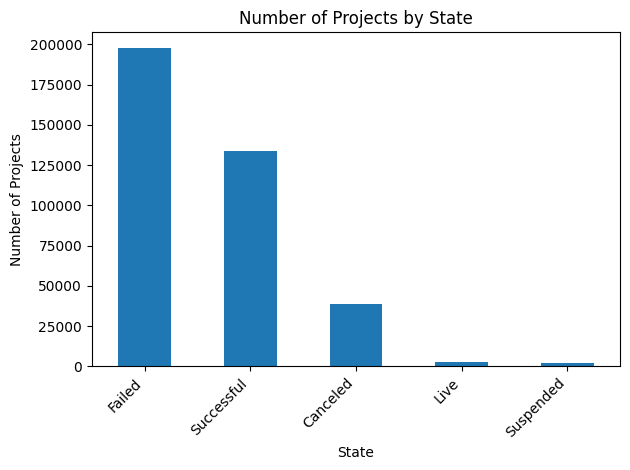

In [22]:
# number of projects by state
state_counts = df["State"].value_counts()

display(state_counts)

# bar chart
ax = state_counts.plot(kind="bar")

ax.set_title("Number of Projects by State")
ax.set_xlabel("State")
ax.set_ylabel("Number of Projects")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Name: count, dtype: int64

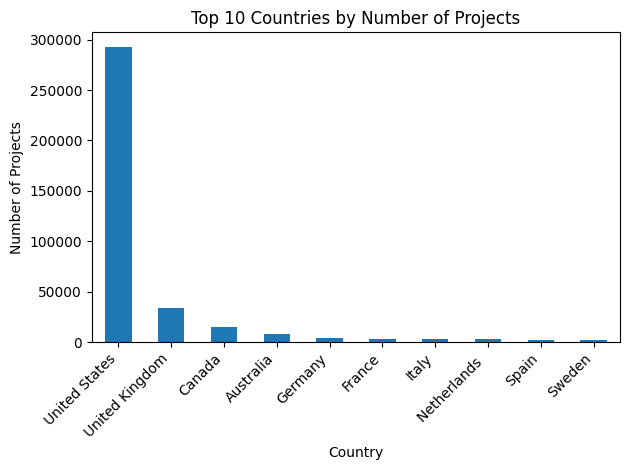

In [23]:
# top 10 countries by number of projects
country_counts = df["Country"].value_counts().head(10)

display(country_counts)

# bar chart
ax = country_counts.plot(kind="bar")

ax.set_title("Top 10 Countries by Number of Projects")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Projects")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [24]:
# success rate
country_states = df_filtered.groupby("Country")["is_success"].agg(
    projects="count",
    success_rate="mean"
).reset_index().sort_values("projects", ascending=False)

country_states = df_filtered.groupby("Country")["is_success"].agg(
    projects="count",
    success_rate="mean"
).reset_index().sort_values("projects", ascending=False)


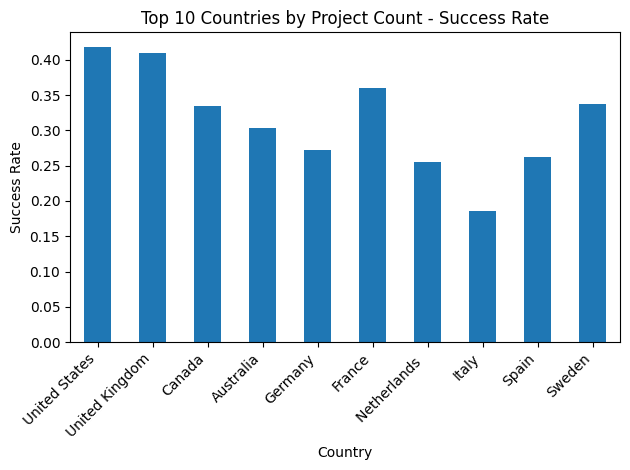

In [26]:
# top 10 countries by project count - success rate
top_n = 10
top_countries = country_states.head(top_n).set_index("Country")

# bar chart
ax = top_countries["success_rate"].plot(kind="bar")

ax.set_title(f"Top {top_n} Countries by Project Count - Success Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Success Rate")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

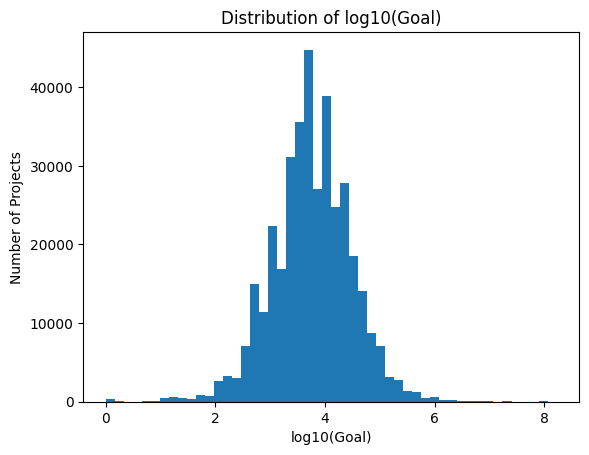

In [28]:
# distribution of goal
df_pos_goal = df[df["Goal"] > 0].copy()
df_pos_goal["log_goal"] = np.log10(df_pos_goal["Goal"])

plt.hist(df_pos_goal["log_goal"], bins=50)
plt.title("Distribution of log10(Goal)")
plt.xlabel("log10(Goal)")
plt.ylabel("Number of Projects")
plt.show()
